In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm

In [2]:
df = pd.DataFrame(pd.read_csv("cancer_classification.csv"))

## Visualization

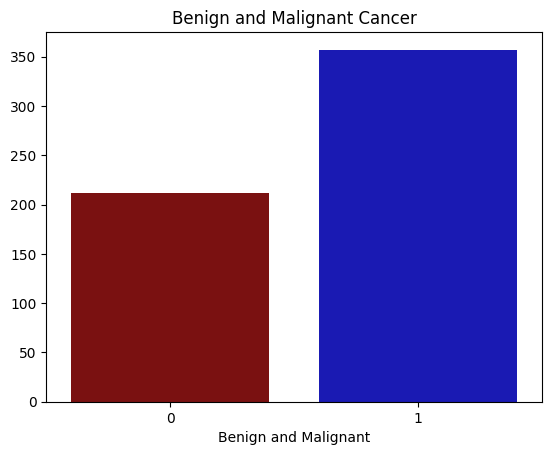

In [38]:
sns.countplot(x="benign_0__mal_1", hue="benign_0__mal_1", data=df, palette=["darkred", "mediumblue"], legend=False)
plt.xlabel("Benign and Malignant")
plt.ylabel("")
plt.title("Benign and Malignant Cancer")
plt.show()

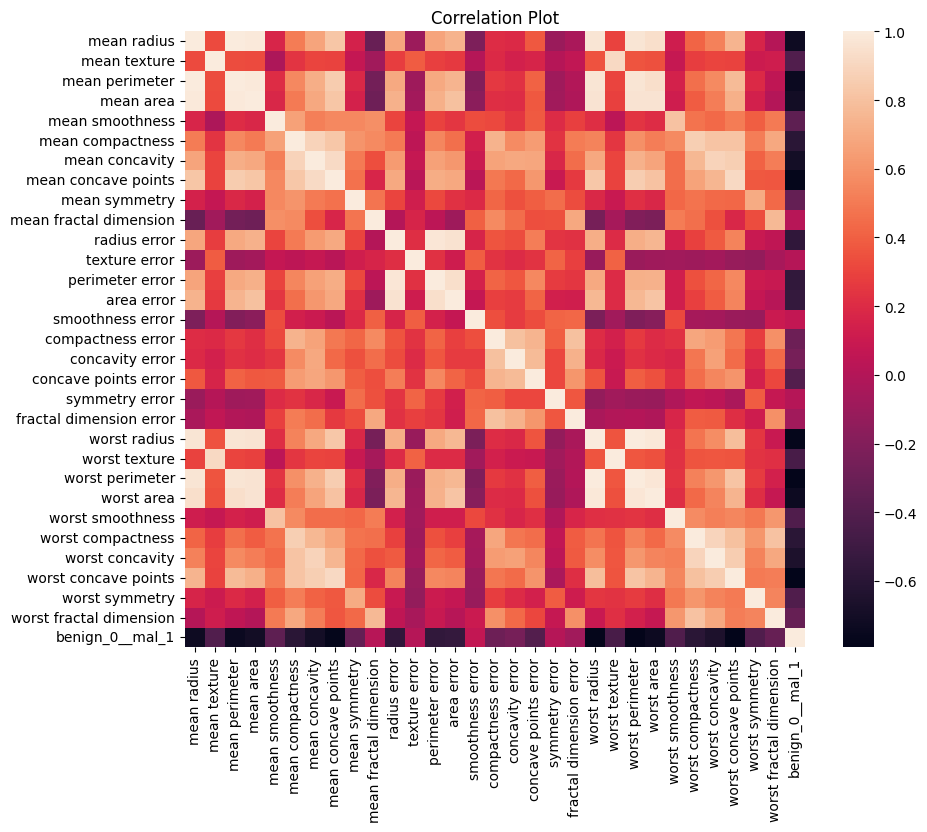

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title("Correlation Plot")
plt.show()

## Define evaluate model function

In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

## Test and Traindata

In [4]:
features = df.iloc[:, :-1].values
X = features
y = df["benign_0__mal_1"].values

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=1337)

## Logistic Regression

In [5]:
model = LogisticRegression(random_state=1337, max_iter=10000)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.958041958041958
Precision: 0.9473684210526315
Recall: 0.989010989010989
F1 Score: 0.967741935483871


## Naive Bayes

In [6]:
model = GaussianNB()
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9440559440559441
Precision: 0.9368421052631579
Recall: 0.978021978021978
F1 Score: 0.956989247311828


## Random forest

In [7]:
model = RandomForestClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.951048951048951
Precision: 0.9666666666666667
Recall: 0.9560439560439561
F1 Score: 0.9613259668508287


## Tree

In [8]:
model = tree.DecisionTreeClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9090909090909091
Precision: 0.9431818181818182
Recall: 0.9120879120879121
F1 Score: 0.9273743016759777


## With PCA and L1 Regularization 

In [9]:
features = df.iloc[:, :-1].values
y = df["benign_0__mal_1"].values
X = features

lasso_reg = Lasso(alpha=0.1)  

lasso_reg.fit(X, y)

selected_features = X[:, lasso_reg.coef_ != 0]

pca = PCA(n_components=5) 
pca.fit(selected_features)
pca_df = pd.DataFrame(pca.transform(selected_features))
pca_df["benign_0__mal_1"] = df["benign_0__mal_1"].values




## Test and Traindata

In [10]:
y = pca_df["benign_0__mal_1"].values
X = pca_df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=1337)

## Logistic Regression

In [11]:
model = LogisticRegression(random_state=1337, max_iter=10000)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9440559440559441
Precision: 0.9278350515463918
Recall: 0.989010989010989
F1 Score: 0.9574468085106383


## Naive Bayes

In [12]:
model = GaussianNB()
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.951048951048951
Precision: 0.9375
Recall: 0.989010989010989
F1 Score: 0.9625668449197861


## Random forest

In [13]:
model = RandomForestClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9790209790209791
Precision: 0.9782608695652174
Recall: 0.989010989010989
F1 Score: 0.9836065573770492


## Tree

In [14]:
model = tree.DecisionTreeClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9370629370629371
Precision: 0.9270833333333334
Recall: 0.978021978021978
F1 Score: 0.9518716577540107


## Test_size = 0.3

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1337)

model = LogisticRegression(random_state=1337, max_iter=10000)
evaluate_model(model, X_train, X_test, y_train, y_test)
print()
               
model = GaussianNB()
evaluate_model(model, X_train, X_test, y_train, y_test)
print()

model = RandomForestClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)
print()

model = tree.DecisionTreeClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9532163742690059
Precision: 0.9391304347826087
Recall: 0.9908256880733946
F1 Score: 0.9642857142857143

Accuracy: 0.9532163742690059
Precision: 0.9391304347826087
Recall: 0.9908256880733946
F1 Score: 0.9642857142857143

Accuracy: 0.9766081871345029
Precision: 0.972972972972973
Recall: 0.9908256880733946
F1 Score: 0.9818181818181818

Accuracy: 0.9415204678362573
Precision: 0.9459459459459459
Recall: 0.963302752293578
F1 Score: 0.9545454545454546


## Test_size = 0.9

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.9, random_state=1337)

model = LogisticRegression(random_state=1337, max_iter=10000)
evaluate_model(model, X_train, X_test, y_train, y_test)
print()
               
model = GaussianNB()
evaluate_model(model, X_train, X_test, y_train, y_test)
print()

model = RandomForestClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)
print()

model = tree.DecisionTreeClassifier(random_state=1337)
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9298245614035088
Precision: 0.9525316455696202
Recall: 0.9347826086956522
F1 Score: 0.9435736677115988

Accuracy: 0.9220272904483431
Precision: 0.9221556886227545
Recall: 0.9565217391304348
F1 Score: 0.9390243902439024

Accuracy: 0.9005847953216374
Precision: 0.9385113268608414
Recall: 0.9006211180124224
F1 Score: 0.919175911251981

Accuracy: 0.9025341130604289
Precision: 0.9276729559748428
Recall: 0.9161490683229814
F1 Score: 0.921875


## PCA for SVM

In [17]:
features = df.iloc[:, :-1].values
y = df["benign_0__mal_1"].values
X = features

lasso_reg = Lasso(alpha=0.1)  

lasso_reg.fit(X, y)

selected_features = X[:, lasso_reg.coef_ != 0]

pca = PCA(n_components=4) 
pca.fit(selected_features)
pca_svm_df = pd.DataFrame(pca.transform(selected_features))
pca_svm_df["benign_0__mal_1"] = df["benign_0__mal_1"].values


## Test and Traindata

In [18]:
y = pca_svm_df["benign_0__mal_1"].values
X = pca_svm_df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=1337)

## SVM

In [19]:
model = svm.SVC()
evaluate_model(model, X_train, X_test, y_train, y_test)

Accuracy: 0.9090909090909091
Precision: 0.8823529411764706
Recall: 0.989010989010989
F1 Score: 0.9326424870466321


# The primary challenge may not stem from the choice of classification model, but rather from the size of the dataset.